# TopoSPAM - Topological Simulation Platform for Active Matter
TopoSpam is a collection of software suite released under GPL 3.0 License for numerical simulation of active matter. It includes....


In [1]:
import TopoSPAM as TopoSPAM

In [2]:
%matplotlib inline

In [4]:
TopoSPAM.set_repo_path('/Users/krishna/PhD/TopoSPAM')

Success: The path '/Users/krishna/PhD/TopoSPAM' contains the TopoSPAM repository.


## Two Dimenstional Active Fluid with Polar Order

We solve the Ericksen-Leslie hydrodynamic model with periodic boundary conditions

$$	\frac{D p_{\alpha}}{D t}=\frac{h_{\alpha}}{\gamma}-\nu u_{\alpha \beta} p_{\beta}+\lambda\Delta\mu p_\alpha+
		\omega_{\alpha \beta} p_{\beta}\label{eqP1}$$
$$		\partial_{\beta} \sigma_{\alpha \beta}-\partial_{\alpha} \Pi=0 $$
$$		\partial_{\gamma} v_{\gamma}=0$$	
$$		2 \eta u_{\alpha \beta}=\sigma_{\alpha \beta}^{(s)}+\zeta \Delta \mu\left(p_{\alpha} p_{\beta}-\frac{1}{2} p_{\gamma} p_{\gamma} \delta_{\alpha \beta}\right)\nonumber-\frac{\nu}{2}\left(p_{\alpha} h_{\beta}+p_{\beta} h_{\alpha}-p_{\gamma} h_{\gamma} \delta_{\alpha \beta}\right)$$	

where p is polarity vector. The meaning of the physical constants can be found in literature :

(https://link.springer.com/article/10.1140/epje/s10189-021-00121-x)

The main source code with intiial conditions is located in bin/Active2d.cpp. This file can be modified as per user needs for different geometries and initial conditions. 

In [5]:
Params = TopoSPAM.ActiveFluidParameters()

In [6]:
#Grid Resolution -- Smaller resolution leads to faster simulation with lower accuracy
Params.Gd_Sz=18
#Splay Constant
Params.Ks=1.0
#Bend Constant
Params.Kb=1.0
#Activity \Delta\mu
Params.dmu=10.0
#Flow aligning or tumbling \nu
Params.nu=0.0
#Contractile zeta=-1, Extentsile zeta=1
Params.zeta=1.0
#Lambda as linear Onsagar coefficient for Polarity
Params.lamda=1.0
#Fluid viscosity
Params.eta=1.0
#Rotational viscosity of Polarity
Params.gama=1.0
#Final Time
Params.tf=10
#Initial time step for the adaptive stepper
Params.dt=1e-2
#How often we would like to write the solution
Params.wrat=1
#Velocity relative error tolerance (Flow Solver)
Params.Vtol=1e-2
#Polarity absolute error tolerance (Time Integrator)
Params.absttol=1e-3
#Polarity relative error tolerance (Time Integrator)
Params.relttol=1e-3

In [7]:
Steps=TopoSPAM.RunActiveFluidSimulation(Params,4)

The simulation took 15.0112(CPU) ------ 15.5377(Wall) Seconds.
Total number of Time steps taken by the adaptive stepper: 698


In [8]:
#Simulation Progress can be monitored but it slows down the simulation.
#Steps=TopoSPAM.RunActiveFluidSimulationWithProgress(Params,4)

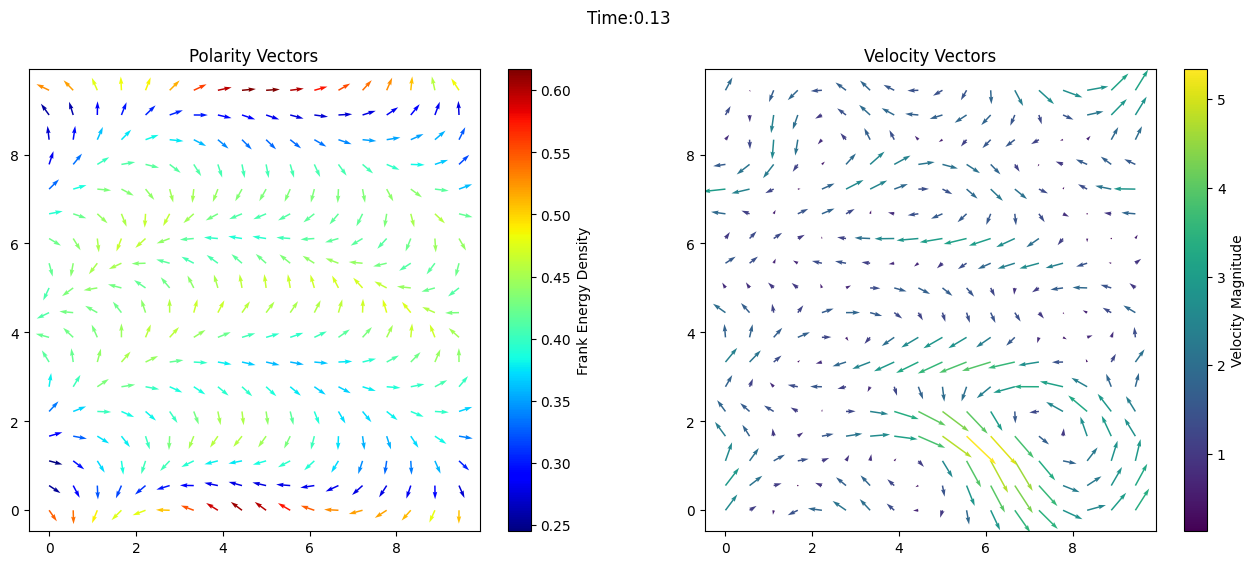

In [9]:
Plot=TopoSPAM.VizualizeIteration(10)

In [12]:
TopoSPAM.VizualizeAnimate(finalStep=int(Steps),jump=10)